In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

# load data
df = pd.read_csv('GOOG.csv')  # replace with your data file
df['Date'] = pd.to_datetime(df['Date'])  # replace 'Date' with your date column
df = df.sort_values('Date')

In [10]:
# create a new scaler for the opening price
scaler_open = MinMaxScaler(feature_range=(0, 1))
df_open = pd.DataFrame(df['Open'])  # replace 'Open' with your opening price column
scaler_open.fit(df_open)

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[df.columns[1:]])

# split data into 80% training and 20% test
train_data, test_data = train_test_split(scaled_data, test_size=0.2, shuffle=False)

# prepare data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 100  # choose the number of previous time steps to use as input variables
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, X_train.shape[2])))  # changed input_shape to match the new shape of the data
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# invert predictions using the opening price scaler
train_predict = scaler_open.inverse_transform(train_predict)
Y_train = scaler_open.inverse_transform([Y_train])
test_predict = scaler_open.inverse_transform(test_predict)
Y_test = scaler_open.inverse_transform([Y_test])

# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Epoch 1/100
1585/1585 - 29s - loss: 0.0035 - 29s/epoch - 18ms/step
Epoch 2/100
1585/1585 - 26s - loss: 1.7303e-04 - 26s/epoch - 17ms/step
Epoch 3/100
1585/1585 - 13s - loss: 1.4256e-04 - 13s/epoch - 8ms/step
Epoch 4/100
1585/1585 - 13s - loss: 1.3457e-04 - 13s/epoch - 8ms/step
Epoch 5/100
1585/1585 - 12s - loss: 1.1973e-04 - 12s/epoch - 8ms/step
Epoch 6/100
1585/1585 - 13s - loss: 1.1137e-04 - 13s/epoch - 8ms/step
Epoch 7/100
1585/1585 - 12s - loss: 1.0072e-04 - 12s/epoch - 8ms/step
Epoch 8/100
1585/1585 - 12s - loss: 9.3636e-05 - 12s/epoch - 8ms/step
Epoch 9/100
1585/1585 - 12s - loss: 8.9532e-05 - 12s/epoch - 8ms/step
Epoch 10/100
1585/1585 - 12s - loss: 8.0236e-05 - 12s/epoch - 8ms/step
Epoch 11/100
1585/1585 - 12s - loss: 7.2073e-05 - 12s/epoch - 8ms/step
Epoch 12/100
1585/1585 - 12s - loss: 6.8416e-05 - 12s/epoch - 8ms/step
Epoch 13/100
1585/1585 - 12s - loss: 6.4819e-05 - 12s/epoch - 8ms/step
Epoch 14/100
1585/1585 - 12s - loss: 6.1492e-05 - 12s/epoch - 8ms/step
Epoch 15/100
1585

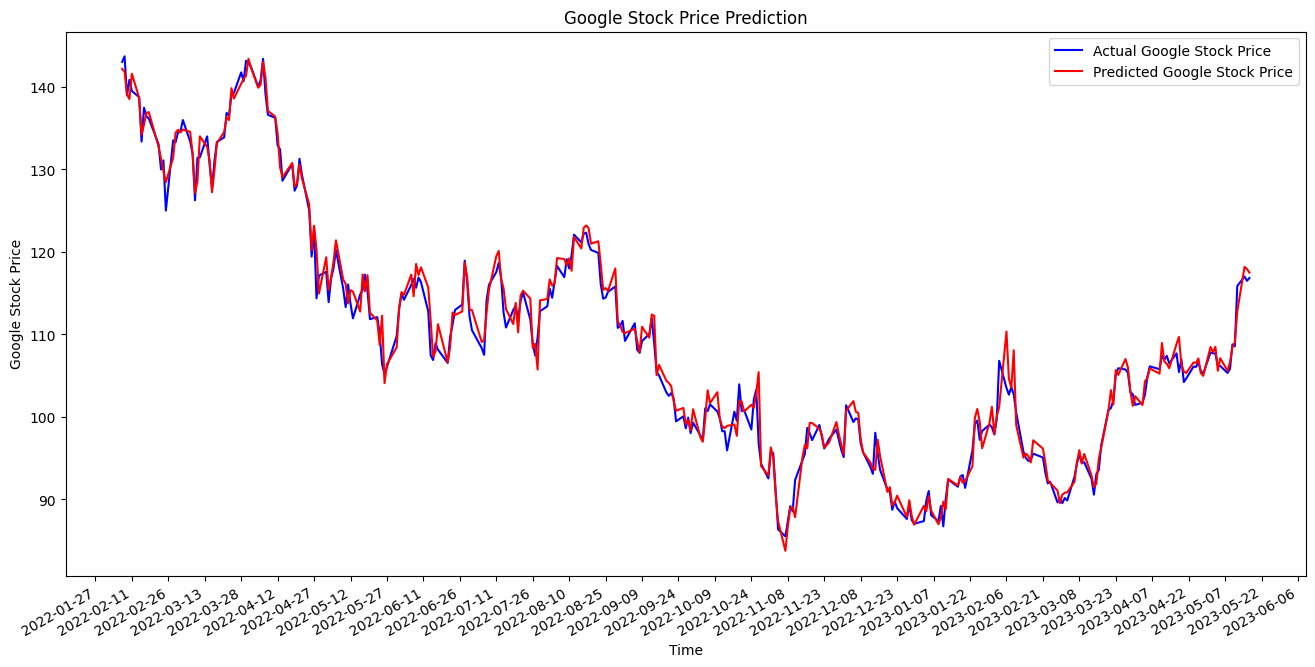

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# convert your date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# get dates for the test data
test_dates = df['Date'].iloc[-len(test_predict):]

# plot the actual price
plt.figure(figsize=(16,8))
plt.plot(test_dates, Y_test[0], color='blue', label='Actual Google Stock Price')

# plot the predicted price
plt.plot(test_dates, test_predict[:,0], color='red', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # adjust interval as needed
plt.gcf().autofmt_xdate()  # rotation of date labels
plt.show()

In [21]:
data = pd.read_csv('GOOG.csv')
Date1 = data['Date']
Price = data['Open']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_data_df = pd.concat(new_data)
new_data_df.dropna(inplace=True)
new_data_df.info()
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])  # Ensure the date column is in datetime format
df = new_data_df.set_index('Date')  # Set the date column as the index of the DataFrame

# Agregați datele în time frame-uri săptămânale
df_weekly = df.resample('W').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df = df_weekly
df = df.drop(df.index[0])

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2108 non-null   object 
 1   Price   2108 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.1+ KB
                 Price
Date                  
2015-01-11   25.410336
2015-01-18   24.871814
2015-01-25   25.870473
2015-02-01   26.109716
2015-02-08   26.331706
...                ...
2023-04-23  105.476999
2023-04-30  106.250002
2023-05-07  106.616002
2023-05-14  111.197000
2023-05-21  117.833333

[437 rows x 1 columns]


In [22]:
data_2 = pd.read_csv('WALCL.csv')
Date1_2 = data_2['Date']
Price_2 = data_2['WALCL']
new_data_2 = []
new_data_2.append(pd.DataFrame({'Date':Date1_2,
                              'Price': Price_2
                              }))
new_data_df_2 = pd.concat(new_data_2)
new_data_df_2.dropna(inplace=True)
new_data_df_2.info()
new_data_df_2['Date'] = pd.to_datetime(new_data_df_2['Date'])  # Ensure the date column is in datetime format
df_2 = new_data_df_2.set_index('Date')  # Set the date column as the index of the DataFrame

# Agregați datele în time frame-uri săptămânale
df_weekly_2 = df_2.resample('W').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df_2 = df_weekly_2

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df_2)

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 436
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    437 non-null    object 
 1   Price   437 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB
                Price
Date                 
2015-01-11  4499524.0
2015-01-18  4516077.0
2015-01-25  4512936.0
2015-02-01  4500064.0
2015-02-08  4500348.0
...               ...
2023-04-23  8593263.0
2023-04-30  8562768.0
2023-05-07  8503994.0
2023-05-14  8503017.0
2023-05-21  8456760.0

[437 rows x 1 columns]


In [26]:
# Definirea funcției create_dataset
def create_dataset_mv(dataset, target, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(target[i + look_back])
    return np.array(dataX), np.array(dataY)

# Încărcarea datelor
google_stock = pd.read_csv('GOOG.csv')
fed_balance = pd.read_csv('WALCL.csv')

# asigură-te că coloana 'Date' este de tip datetime
google_stock['Date'] = pd.to_datetime(google_stock['Date'])
fed_balance['Date'] = pd.to_datetime(fed_balance['Date'])

# Unirea seturilor de date pe baza datei
data = pd.merge(google_stock, fed_balance, on='Date')

# Setează data ca index
data.set_index('Date', inplace=True)

# Separating the target variable
target = data['Open'].values
data = data.drop('Open', axis=1)

# Scale the data
scaler_data = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_data.fit_transform(data)

# Scale the target
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.reshape(-1, 1))

# Create datasets for LSTM
look_back = 1
X, Y = create_dataset_mv(scaled_data, scaled_target, look_back)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions with the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the scaling
train_predict = scaler_target.inverse_transform(train_predict)
Y_train = scaler_target.inverse_transform(Y_train)
test_predict = scaler_target.inverse_transform(test_predict)
Y_test = scaler_target.inverse_transform(Y_test)

Epoch 1/100
344/344 - 1s - loss: 0.0136 - 1s/epoch - 4ms/step
Epoch 2/100
344/344 - 0s - loss: 0.0020 - 253ms/epoch - 736us/step
Epoch 3/100
344/344 - 0s - loss: 9.8955e-04 - 254ms/epoch - 739us/step
Epoch 4/100
344/344 - 0s - loss: 6.7999e-04 - 253ms/epoch - 736us/step
Epoch 5/100
344/344 - 0s - loss: 4.9037e-04 - 256ms/epoch - 745us/step
Epoch 6/100
344/344 - 0s - loss: 3.8790e-04 - 260ms/epoch - 757us/step
Epoch 7/100
344/344 - 0s - loss: 3.3367e-04 - 254ms/epoch - 740us/step
Epoch 8/100
344/344 - 0s - loss: 3.1575e-04 - 258ms/epoch - 750us/step
Epoch 9/100
344/344 - 0s - loss: 3.1352e-04 - 259ms/epoch - 753us/step
Epoch 10/100
344/344 - 0s - loss: 3.0518e-04 - 264ms/epoch - 767us/step
Epoch 11/100
344/344 - 0s - loss: 3.1117e-04 - 262ms/epoch - 761us/step
Epoch 12/100
344/344 - 0s - loss: 3.2974e-04 - 259ms/epoch - 752us/step
Epoch 13/100
344/344 - 0s - loss: 3.2010e-04 - 258ms/epoch - 750us/step
Epoch 14/100
344/344 - 0s - loss: 3.2561e-04 - 258ms/epoch - 749us/step
Epoch 15/100
3

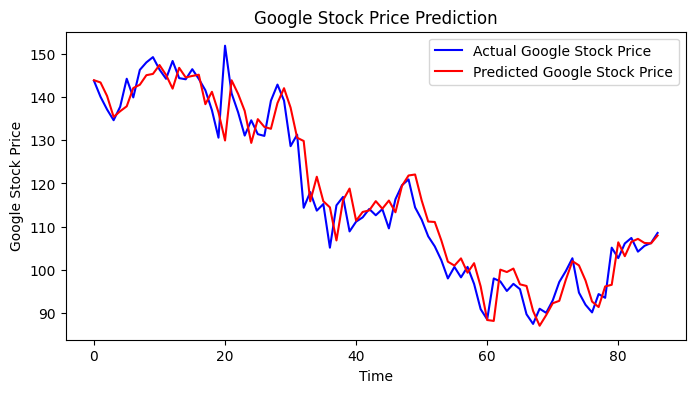

In [27]:
import matplotlib.pyplot as plt

# Generarea graficului pentru datele test și predicțiile modelului
plt.figure(figsize=(8,4))
plt.plot(Y_test, color='blue', label='Actual Google Stock Price')
plt.plot(test_predict, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [38]:
# Supunem că 'X_test' este setul de date de intrare pentru ultima perioadă de timp pe care o ai (i.e., ultimele 3 luni)
# 'num_predictions' este numărul de zile pentru care vrei să faci predicții
num_predictions = 90

# Creăm un array în care să păstrăm predicțiile
predictions = []

# Începem cu ultimul sample din X_test
last_sample = X_test[-1]

for _ in range(num_predictions):
    # Facem predicție pentru ultimul sample
    prediction = model.predict(last_sample.reshape(1, 1, -1))

    # Adăugăm predicția în lista de predicții
    predictions.append(prediction[0][0])

    # Creăm noul sample prin adăugarea predicției la sfârșit și eliminând prima valoare
    last_sample = np.roll(last_sample, -1)
    last_sample[-1] = prediction

# Revenim la scala originală
predictions = scaler_target.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 [==============================] - 0s 14ms/step


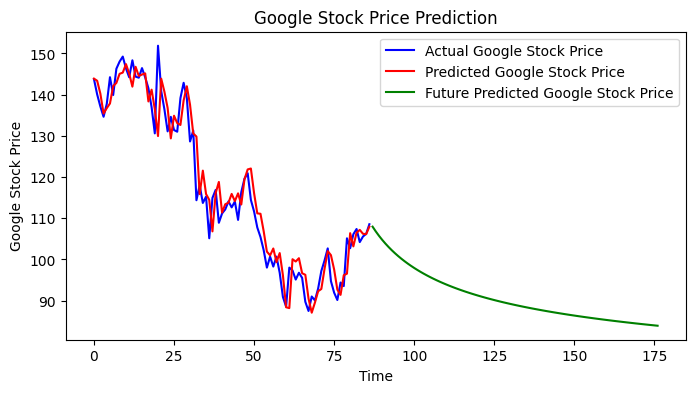

In [39]:

# Get the last date in the index
last_date = google_stock.index[-1]

# Generate future dates starting from the next day after the last date in the index
future_dates = pd.date_range(start=last_date, periods=num_predictions+1)[1:]

# Create the plot
plt.figure(figsize=(8,4))
plt.plot(Y_test, color='blue', label='Actual Google Stock Price')
plt.plot(test_predict, color='red', label='Predicted Google Stock Price')
plt.plot(range(len(Y_test), len(Y_test) + len(predictions)), predictions, color='green', label='Future Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [40]:
# Definirea funcției create_dataset
def create_dataset_mv(dataset, target, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(target[i + look_back])
    return np.array(dataX), np.array(dataY)

# Încărcarea datelor
google_stock = pd.read_csv('GOOG.csv')
fed_balance = pd.read_csv('WALCL.csv')

# asigură-te că coloana 'Date' este de tip datetime
google_stock['Date'] = pd.to_datetime(google_stock['Date'])
fed_balance['Date'] = pd.to_datetime(fed_balance['Date'])

# Unirea seturilor de date pe baza datei
data = pd.merge(google_stock, fed_balance, on='Date')

# Setează data ca index
data.set_index('Date', inplace=True)

# Separating the target variable
target = data['Open'].values
data = data.drop('Open', axis=1)

# Scale the data
scaler_data = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_data.fit_transform(data)

# Scale the target
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.reshape(-1, 1))

# Create datasets for LSTM
look_back = 10
X, Y = create_dataset_mv(scaled_data, scaled_target, look_back)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions with the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the scaling
train_predict = scaler_target.inverse_transform(train_predict)
Y_train = scaler_target.inverse_transform(Y_train)
test_predict = scaler_target.inverse_transform(test_predict)
Y_test = scaler_target.inverse_transform(Y_test)

Epoch 1/100
337/337 - 4s - loss: 0.0809 - 4s/epoch - 11ms/step
Epoch 2/100
337/337 - 1s - loss: 0.0058 - 1s/epoch - 3ms/step
Epoch 3/100
337/337 - 1s - loss: 0.0011 - 1s/epoch - 4ms/step
Epoch 4/100
337/337 - 1s - loss: 0.0010 - 1s/epoch - 4ms/step
Epoch 5/100
337/337 - 1s - loss: 9.2511e-04 - 1s/epoch - 3ms/step
Epoch 6/100
337/337 - 1s - loss: 8.5390e-04 - 1s/epoch - 3ms/step
Epoch 7/100
337/337 - 1s - loss: 8.1372e-04 - 1s/epoch - 4ms/step
Epoch 8/100
337/337 - 1s - loss: 7.3915e-04 - 1s/epoch - 4ms/step
Epoch 9/100
337/337 - 1s - loss: 7.5126e-04 - 1s/epoch - 4ms/step
Epoch 10/100
337/337 - 1s - loss: 6.9675e-04 - 1s/epoch - 3ms/step
Epoch 11/100
337/337 - 1s - loss: 6.2325e-04 - 1s/epoch - 4ms/step
Epoch 12/100
337/337 - 1s - loss: 6.3655e-04 - 1s/epoch - 3ms/step
Epoch 13/100
337/337 - 1s - loss: 6.1162e-04 - 1s/epoch - 4ms/step
Epoch 14/100
337/337 - 1s - loss: 5.6896e-04 - 1s/epoch - 3ms/step
Epoch 15/100
337/337 - 1s - loss: 5.9271e-04 - 1s/epoch - 4ms/step
Epoch 16/100
337/33

In [42]:
# Supunem că 'X_test' este setul de date de intrare pentru ultima perioadă de timp pe care o ai (i.e., ultimele 3 luni)
# 'num_predictions' este numărul de zile pentru care vrei să faci predicții
num_predictions = 90

# Creăm un array în care să păstrăm predicțiile
predictions = []

# Începem cu ultimul sample din X_test
last_sample = X_test[-1]

for _ in range(num_predictions):
    # Facem predicție pentru ultimul sample
    prediction = model.predict(last_sample.reshape(1, look_back, -1))

    # Adăugăm predicția în lista de predicții
    predictions.append(prediction[0][0])

    # Creăm noul sample prin adăugarea predicției la sfârșit și eliminând prima valoare
    last_sample = np.roll(last_sample, -1)
    last_sample[-1] = prediction

# Revenim la scala originală
predictions = scaler_target.inverse_transform(np.array(predictions).reshape(-1, 1))

1/1 [==============================] - 0s 42ms/step


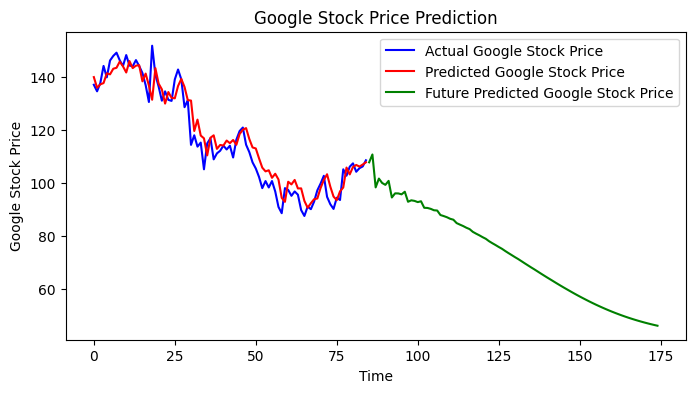

In [43]:
# Get the last date in the index
last_date = google_stock.index[-1]

# Generate future dates starting from the next day after the last date in the index
future_dates = pd.date_range(start=last_date, periods=num_predictions+1)[1:]

# Create the plot
plt.figure(figsize=(8,4))
plt.plot(Y_test, color='blue', label='Actual Google Stock Price')
plt.plot(test_predict, color='red', label='Predicted Google Stock Price')
plt.plot(range(len(Y_test), len(Y_test) + len(predictions)), predictions, color='green', label='Future Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()